In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import random

RAW DATA IMPORT

In [ ]:
onion_url='https://raw.githubusercontent.com/s00singla/MyPriceData/main/Delhi_Onion_Dec_2020.csv'
dataframe = pd.read_csv(onion_url,parse_dates=[0],dayfirst=True)

In [ ]:
dataset = pd.read_csv(onion_url, usecols=[1], engine='python')
dataset = dataset.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.87)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

167 26


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(1226)
random.set_seed(1226)

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(16, input_shape=(1, look_back), return_sequences=True))
model.add(LSTM(8, dropout=0.2,return_sequences= True))#,return_sequences= True
model.add(LSTM(4, dropout=0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size= 1, verbose=2)

Epoch 1/200
165/165 - 5s - loss: 0.0204
Epoch 2/200
165/165 - 0s - loss: 0.0166
Epoch 3/200
165/165 - 0s - loss: 0.0153
Epoch 4/200
165/165 - 0s - loss: 0.0134
Epoch 5/200
165/165 - 0s - loss: 0.0113
Epoch 6/200
165/165 - 0s - loss: 0.0074
Epoch 7/200
165/165 - 0s - loss: 0.0057
Epoch 8/200
165/165 - 0s - loss: 0.0060
Epoch 9/200
165/165 - 0s - loss: 0.0057
Epoch 10/200
165/165 - 0s - loss: 0.0061
Epoch 11/200
165/165 - 0s - loss: 0.0054
Epoch 12/200
165/165 - 0s - loss: 0.0057
Epoch 13/200
165/165 - 0s - loss: 0.0053
Epoch 14/200
165/165 - 0s - loss: 0.0050
Epoch 15/200
165/165 - 0s - loss: 0.0061
Epoch 16/200
165/165 - 0s - loss: 0.0074
Epoch 17/200
165/165 - 0s - loss: 0.0066
Epoch 18/200
165/165 - 0s - loss: 0.0066
Epoch 19/200
165/165 - 0s - loss: 0.0055
Epoch 20/200
165/165 - 0s - loss: 0.0055
Epoch 21/200
165/165 - 0s - loss: 0.0060
Epoch 22/200
165/165 - 0s - loss: 0.0060
Epoch 23/200
165/165 - 0s - loss: 0.0056
Epoch 24/200
165/165 - 0s - loss: 0.0051
Epoch 25/200
165/165 - 0s

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 370.23 RMSE
Test Score: 802.98 RMSE


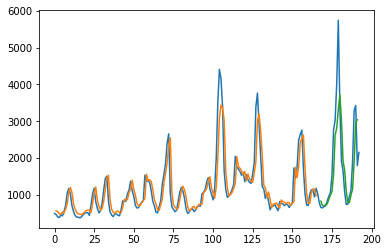

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
trainPredict.flatten()

array([ 562.2472 ,  539.6252 ,  481.23062,  468.5031 ,  529.2386 ,
        506.85364,  615.93884,  760.6071 , 1078.956  , 1198.8401 ,
       1058.62   ,  751.4133 ,  607.9638 ,  513.7239 ,  477.83115,
        477.83115,  460.04935,  488.8942 ,  528.3747 ,  572.7418 ,
        577.1244 ,  584.1487 ,  518.8867 ,  762.44824, 1055.7186 ,
       1208.6338 ,  852.61224,  689.4178 ,  577.1244 ,  624.8212 ,
        815.2291 , 1150.9415 , 1461.2975 , 1530.0055 ,  872.34546,
        604.42523,  525.7841 ,  489.74686,  549.1765 ,  553.5276 ,
        518.8867 ,  511.14572,  655.1864 ,  875.17035,  859.182  ,
        868.58124, 1057.6528 , 1158.7505 , 1395.3916 , 1139.2368 ,
        993.1    ,  762.44824,  696.6629 ,  704.8294 ,  788.30145,
        840.43274,  898.766  , 1558.399  , 1382.5964 , 1408.1852 ,
       1357.9895 , 1140.2118 ,  862.9397 ,  745.9064 ,  592.9497 ,
        578.0016 ,  725.774  ,  887.4279 , 1321.5781 , 1572.0876 ,
       1854.1595 , 2339.2202 , 2550.4878 , 1072.1724 ,  730.34

In [ ]:
testPredict.flatten()

array([ 825.4821 ,  711.19257,  697.5696 ,  732.1695 ,  746.8238 ,
        870.46313,  992.1406 , 1086.7147 , 1538.8225 , 2619.395  ,
       2809.1611 , 3301.562  , 3725.309  , 3015.852  , 1918.8838 ,
       1666.5133 , 1109.054  ,  786.44995,  788.30145,  993.1    ,
       1152.8933 , 1897.3983 , 2966.5037 , 3037.5967 ], dtype=float32)

In [ ]:
testY

array([[ 655.9999975 ,  641.00001861,  679.00000516,  694.99998264,
         828.00003565,  956.00001564, 1053.99999781, 1514.99998952,
        2751.00017154, 3031.00009773, 4010.00000094, 5742.99964362,
        3383.99992119, 1911.00007271, 1645.99996528, 1076.99996544,
         738.00000219,  739.99999937,  957.00001423, 1122.00006224,
        1888.00010508, 3293.99972759, 3425.00002361, 1792.00008006]])